<a href="https://colab.research.google.com/github/orital04/tinyProject3/blob/main/tinyProject3_Ori_Tal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 dir="rtl">
פרויקטון 3 - אורי טל
</h1>

<h2 dir="rtl">
הצגת מטרת המחברת 
</h2>
<h6 dir="rtl"> במחברת הזו ננסה לחזות האם בתמונה יש חתול או כלב
</h6>

<h6 dir="rtl">
ראשית, נעשה ייבוא של הספריות הדרושות
</h6>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import plot_model
import keras.backend as K

<h6 dir="rtl">
ייבוא מערך הנתונים: <br>
אני מייבא את הנתונים מהדרייב שלי, על ידי כך ששמרתי את כל התמונות אשר אשתמש בהן במחברת זו בדרייב שלי, כשבדרייב עצמו התמונות כבר מחולקות לtraining set ול-validation set, כשבתוכם יש חלוקה ל2 classes - חתול וכלב.
</h6>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h6 dir="rtl">
חלוקת הנתונים לtraining set ולvalidation set.
</h6>

In [ ]:
image_size = (256, 256)
batch_size = 20

train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/dataForTinyProject3/train_ds',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=image_size 
    )
    
val_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/dataForTinyProject3/val_ds',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,    
    image_size=image_size 
    )

Found 160 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


<h6 dir="rtl">
ניתן לראות שהחלוקה מתבצעת כך שיש 160 תמונות בtraining set ו40 תמונות בvalidation set, כשבכל מערך התמונות מחולקות ל2 classes.
</h6>

<h6 dir="rtl">
אציג כעת חלק מהתתמונות במערך האימון, לדוגמה:
</h6>

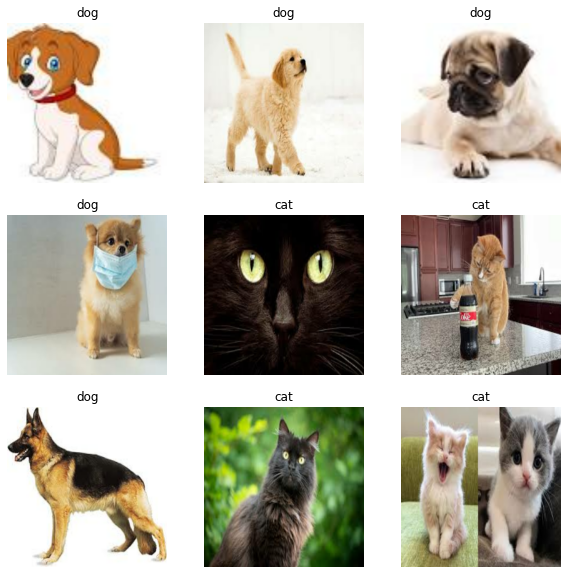

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

<h6 dir="rtl">
נעשה כעת אוגמנטציה ונראה את משמעות הפעלת הפעולה על הנתונים (התמונות)
</h6>

In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.2),
     layers.RandomTranslation(
     height_factor = (-0.2, 0.3),
     width_factor = (-0.2, 0.3),
     fill_mode = "nearest",
     interpolation = "nearest"
     )
    ]
)

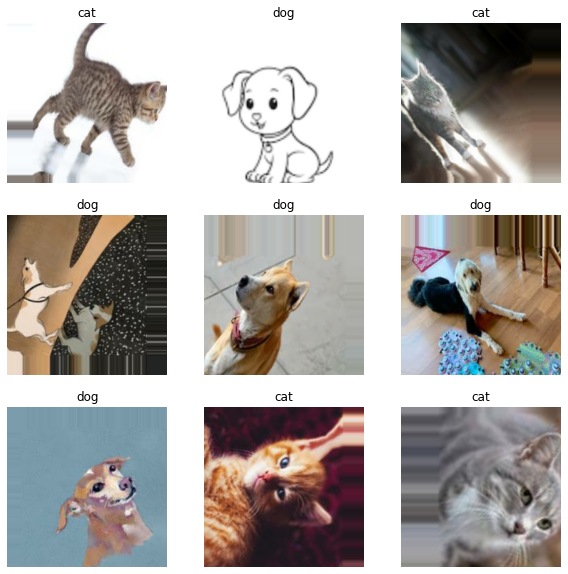

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    
    x = layers.Rescaling(scale=1 / 127.5, offset=-1)(x)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.Conv2D(64, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.Conv2D(128, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(256, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.Conv2D(256, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(512, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.Conv2D(512, (3, 3), strides=(1, 1), padding="same", activation = "relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(10)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation = 'sigmoid')(x)
    
    return keras.Model(inputs, outputs)


model = make_model((256,256,3), 2)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                           

<h6 dir="rtl">
סרטוט המודל
</h6>

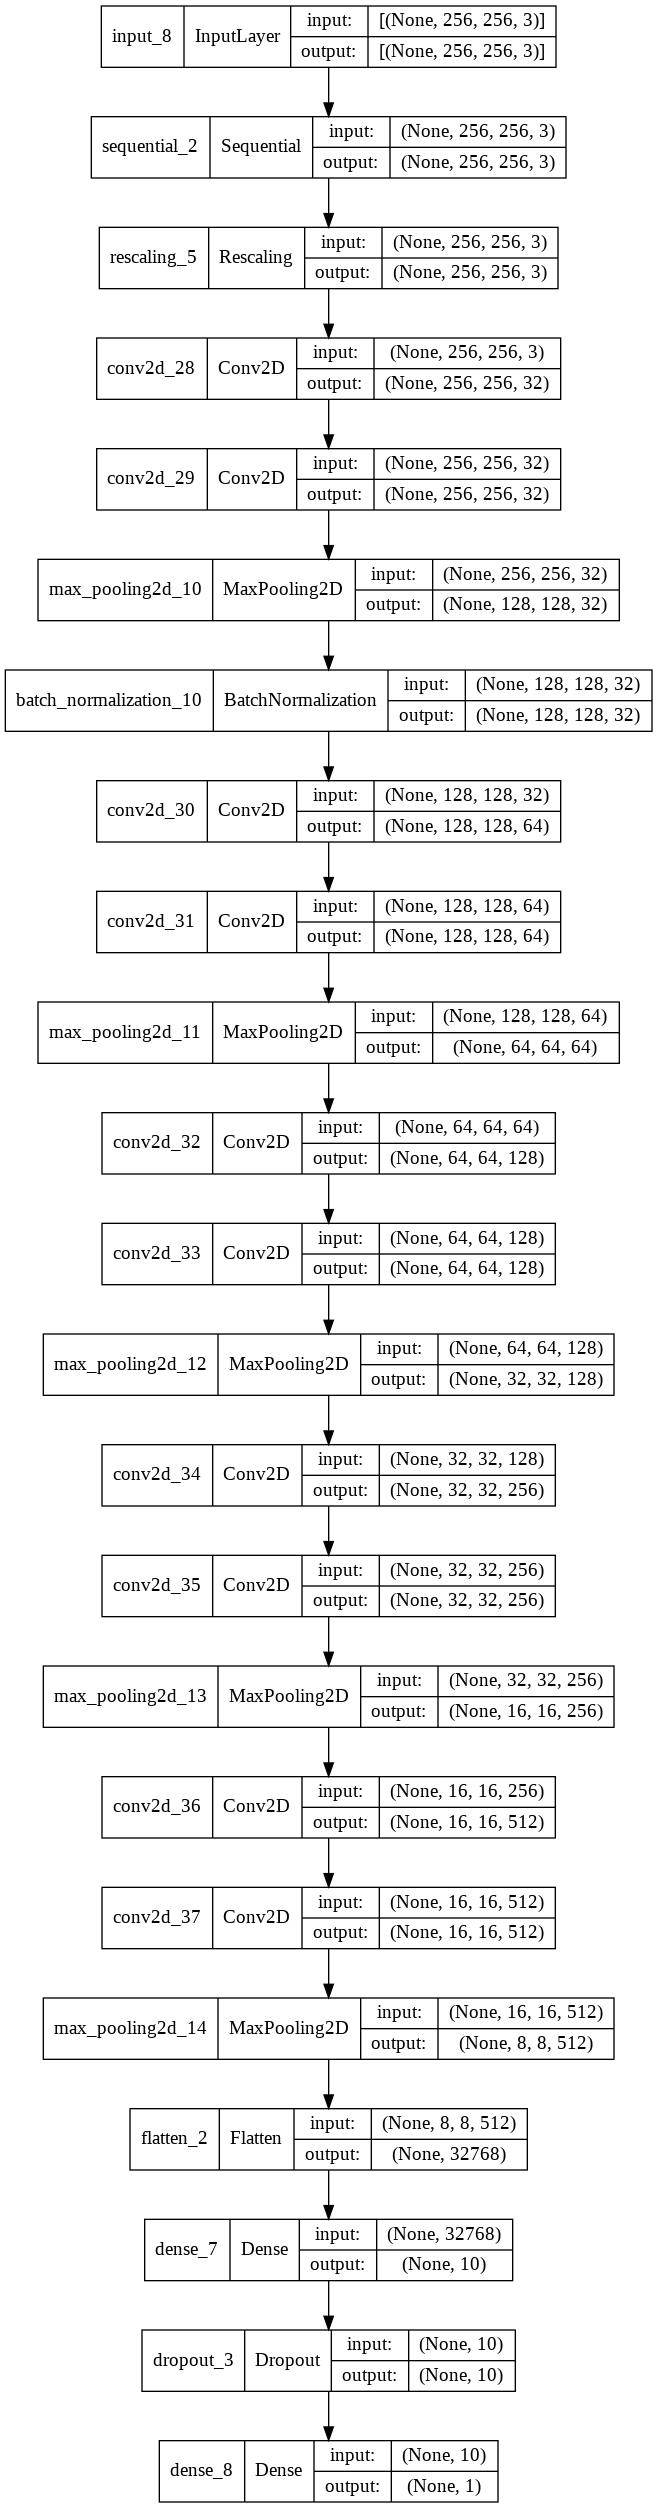

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

<h6 dir="rtl">
כעת אייבא GPU על מנת שהרשת תתאמן באופן מהיר יותר (אפשרות לעשיית הרבה חישובים במקביל)
</h6>

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13285071426337308829
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3133502926183319033
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
from keras import backend as K
K._get_available_gpus() 


['/device:GPU:0']

In [ ]:
epochs = 15

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])

history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds
)


Epoch 1/15
8/8 [==============================] - 5s 387ms/step - loss: 0.7254 - binary_accuracy: 0.5312 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 3s 351ms/step - loss: 0.7037 - binary_accuracy: 0.4938 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 3s 351ms/step - loss: 0.6929 - binary_accuracy: 0.5250 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 3s 351ms/step - loss: 0.6927 - binary_accuracy: 0.4875 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 3s 350ms/step - loss: 0.6899 - binary_accuracy: 0.5125 - val_loss: 0.6927 - val_binary_accuracy: 0.5250
Epoch 6/15
8/8 [==============================] - 3s 355ms/step - loss: 0.6891 - binary_accuracy: 0.5000 - val_loss: 0.6911 - val_binary_accuracy: 0.5750
Epoch 7/15
8/8 [==============================] - 3s 352ms/step - loss: 0.68

<h6 dir="rtl">
סיכום גרפי של היסטוריית למידת המודל מבחינת השגיאה עבור סט האימון ועבור סט הולידציה - עבור המודל המקורי
</h6>

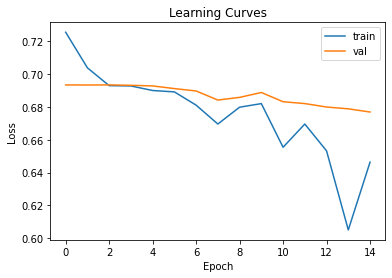

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

<h6 dir="rtl">
סיכום גרפי של היסטוריית למידת המודל מבחינת אחוז הדיוק עבור סט האימון ועבור סט הולידציה
</h6>

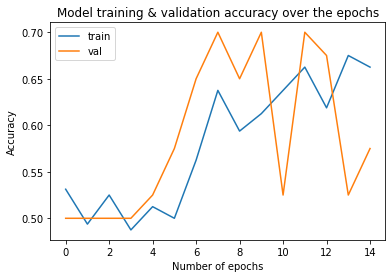

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model training & validation accuracy over the epochs')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h6 dir="rtl">
כפי שניתן לראות, הדיוק לאחר אימון המכונה לא גבוה ויציב מספיק בשביל לומר שהמכונה אכן הצליחה ללמוד לזהות האם בתמונה יש חתול או כלב באחוז דיוק טוב
</h6>

<h5 dir="rtl">
כעת אעשה שימוש בטרנספר לרנינג, בו נעשה שימוש במשקלים מלמידה מוקדמת (פה אשתמש במודל Xception אשר אומן על מערך התמונות imagenet)
</h5>

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(256, 256, 3),
    include_top=False) #imagenetלא לכלול את השכבה האחרונה שהותאמה לזיהוי ב

<h6 dir="rtl">
הקפאה של כל שכבות מודל הבסיס
</h6>

In [ ]:
base_model.trainable = False

<h6 dir="rtl">
אצור מודל חדש על גבי הפלט של מודל הבסיס
</h6>

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.1)(x)  
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                           

<h6 dir="rtl">
סרטוט המודל
</h6>

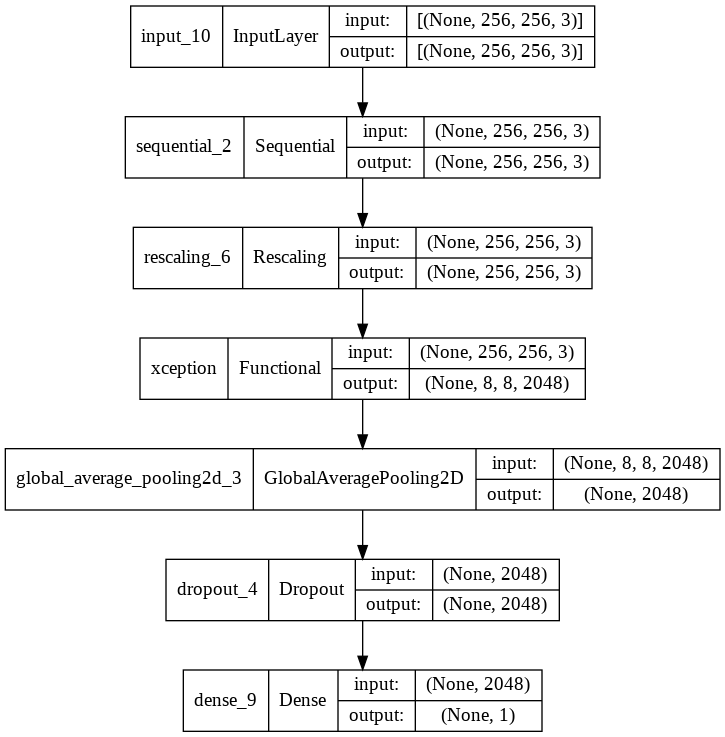

In [ ]:
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
8/8 [==============================] - 8s 527ms/step - loss: 0.6326 - binary_accuracy: 0.5813 - val_loss: 0.4587 - val_binary_accuracy: 0.6500
Epoch 2/20
8/8 [==============================] - 3s 335ms/step - loss: 0.5240 - binary_accuracy: 0.6313 - val_loss: 0.3258 - val_binary_accuracy: 0.7750
Epoch 3/20
8/8 [==============================] - 3s 337ms/step - loss: 0.4114 - binary_accuracy: 0.8125 - val_loss: 0.2317 - val_binary_accuracy: 0.9500
Epoch 4/20
8/8 [==============================] - 3s 336ms/step - loss: 0.3675 - binary_accuracy: 0.8813 - val_loss: 0.1768 - val_binary_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 3s 341ms/step - loss: 0.3283 - binary_accuracy: 0.8875 - val_loss: 0.1499 - val_binary_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 3s 337ms/step - loss: 0.3027 - binary_accuracy: 0.8813 - val_loss: 0.1288 - val_binary_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 3s 337ms/step - loss: 0.25

<h6 dir="rtl">
סיכום גרפי של היסטוריית למידת המודל מבחינת השגיאה עבור סט האימון ועבור סט הולידציה - עבור המודל שייבאתי על ידי transfer learning ולפני fine tuning עליו
</h6>

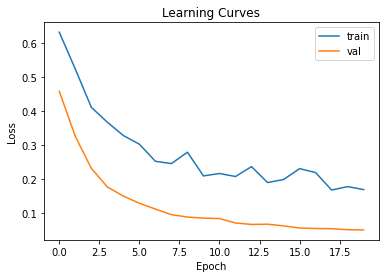

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

<h6 dir="rtl">
סיכום גרפי של היסטוריית למידת המודל מבחינת אחוז הדיוק עבור סט האימון ועבור סט הולידציה - עבור המודל שייבאתי על ידי transfer learning ולפני fine tuning עליו
</h6>

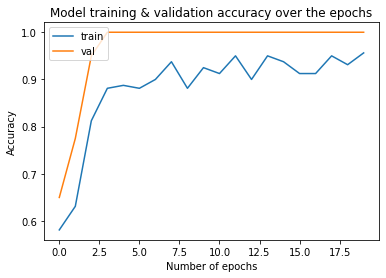

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model training & validation accuracy over the epochs')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h6 dir="rtl">
קיבלנו דיוק מדהים (שיפור מטורף ביחס למודל המקורי)
</h6>

<h6 dir="rtl">
אעשה fine tuning על המודל שייבאתי מקודם בעזרת transfer learning:
<br>
הסבר לתהליך יצירת הfine tuning - לאחר שאימנו את המודל החדש (את השכבה החדשה במודל שהוספנו) על הנתונים שלנו, מוציאים מהקפאה את השכבות ממודל הבסיס, ולאחר מכן מאמנים את כל המודל שוב (המודל אומן בעבר, רק על מערך נתונים אחר) - עם שיעור אימון קטן מאוד, שכן יכולים להגיע פה לאוברפיט מהר מאוד (המון פרמטרים וכו')

In [ ]:
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 10
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                           

<h6 dir="rtl">
סרטוט המודל
</h6>

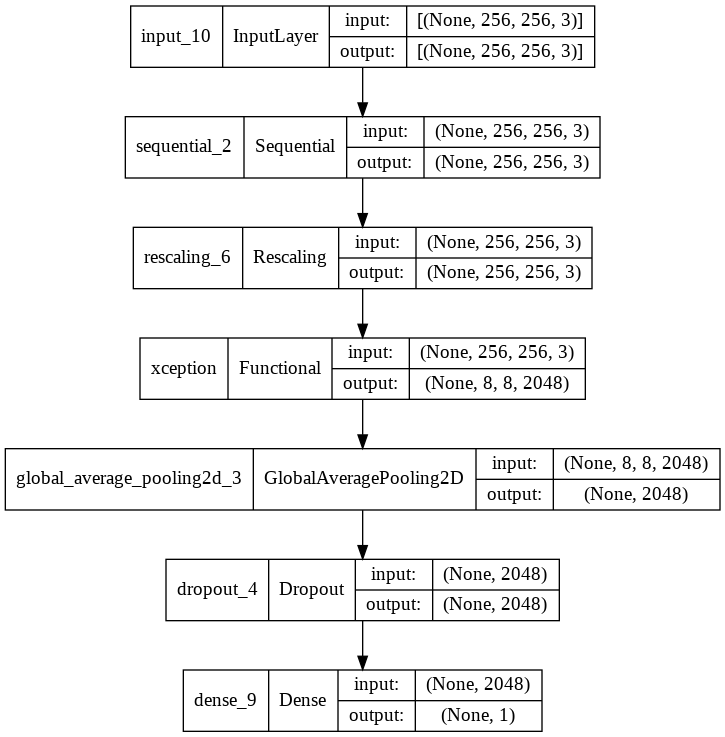

In [ ]:
plot_model(model, 'model.png', show_shapes=True)

<h6 dir="rtl">
סיכום גרפי של היסטוריית למידת המודל מבחינת השגיאה עבור סט האימון ועבור סט הולידציה - עבור המודל שייבאתי על ידי transfer learning ואחרי fine tuning עליו
</h6>

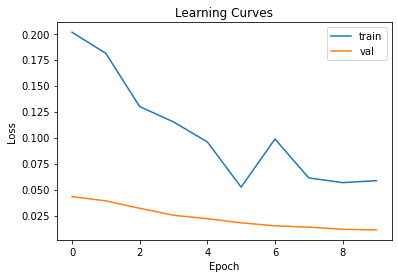

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

<h6 dir="rtl">
סיכום גרפי של היסטוריית למידת המודל מבחינת אחוז הדיוק עבור סט האימון ועבור סט הולידציה - עבור המודל שייבאתי על ידי transfer learning ואחרי fine tuning עליו
</h6>

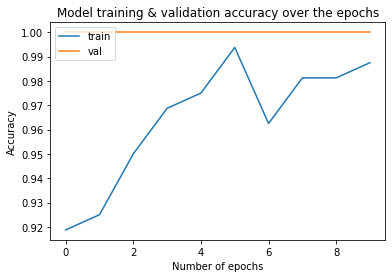

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model training & validation accuracy over the epochs')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h6 dir="rtl">
הצלחנו לשפר אפילו עוד קצת את הדיוק על מערך האימון (הולידציה כבר ב100% דיוק ממקודם) - אשר הגיע לבערך 98% דיוק
</h6>